# 1. データ準備(datetime)

In [1]:
import glob
import os
import pandas as pd
import japanize_matplotlib
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# ファイル名取り出し
file_names = []
for f in glob.glob('input/*.csv'):
    file_names.append(os.path.split(f)[1])
file_names


['input1.csv', 'input2.csv']

In [3]:
# データ読み込み
def read_data():
    years = []
    for i in file_names:
        # # 複数ヘッダのまま読み込み
        # df_head = pd.read_csv('input/' + i, encoding="SHIFT-JIS", header=[0,1,2])
        # years.append(df)

        # ヘッダ読み込み
        temp = pd.read_csv('input2/' + i, header=None, nrows=3)
        temp = temp.fillna('')
        header = temp.iloc[0] + '_[' + temp.iloc[1] + ']_' + temp.iloc[2]
        header = header.tolist()
        # '_[]_'を削除
        temp = []
        for j in header:
            if '_[]_' in j:
                j = j.replace('_[]_', '')
            temp.append(j)
        header = temp
        
        # データ読み込み
        df = pd.read_csv('input2/' + i, header=None, skiprows=3)
        df.columns = header

        # 結合
        years.append(df)
        df_concat = pd.concat(years, axis=1)
        
    return df_concat

df = read_data()
df.head()

,date,time,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,date,time,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4
0,2001/3/31,00:00:00,A,A-1,11,10.1,2001/3/31,00:00:00,A,A-1,11,10.1
1,2001/9/30,00:00:00,A,A-1,31,30.1,2001/9/30,00:00:00,A,A-1,31,30.1
2,2002/3/31,00:00:00,A,A-1,11,10.1,2002/3/31,00:00:00,A,A-1,11,10.1
3,2002/9/30,00:00:00,A,A-1,31,30.1,2002/9/30,00:00:00,A,A-1,31,30.1
4,2003/3/31,00:00:00,A,A-1,11,10.1,2003/3/31,00:00:00,A,A-1,11,10.1


In [4]:
# 重複列を削除
df = df.loc[:,~df.columns.duplicated()]
df.head()

,date,time,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4
0,2001/3/31,00:00:00,A,A-1,11,10.1,A,A-1,11,10.1
1,2001/9/30,00:00:00,A,A-1,31,30.1,A,A-1,31,30.1
2,2002/3/31,00:00:00,A,A-1,11,10.1,A,A-1,11,10.1
3,2002/9/30,00:00:00,A,A-1,31,30.1,A,A-1,31,30.1
4,2003/3/31,00:00:00,A,A-1,11,10.1,A,A-1,11,10.1


In [5]:
# 列結合
df['datetime'] = df['date'] + 'T' + df['time']
df = df.drop(columns=['date', 'time'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4,datetime
0,A,A-1,11,10.1,A,A-1,11,10.1,2001-03-31
1,A,A-1,31,30.1,A,A-1,31,30.1,2001-09-30
2,A,A-1,11,10.1,A,A-1,11,10.1,2002-03-31
3,A,A-1,31,30.1,A,A-1,31,30.1,2002-09-30
4,A,A-1,11,10.1,A,A-1,11,10.1,2003-03-31


In [6]:
df.dtypes

1_[input1]_cat1            object
2_[input1]_cat2            object
3_[input1]_num1             int64
4_[input1]_num2           float64
5_[input2]_cat3            object
6_[input2]_cat4            object
7_[input2]_num3             int64
8_[input2]_num4           float64
datetime           datetime64[ns]
dtype: object

# 2. とりあえず描画(datetime)

In [7]:
dfa = df
dfa = dfa.set_index('datetime')
dfa.dtypes

1_[input1]_cat1     object
2_[input1]_cat2     object
3_[input1]_num1      int64
4_[input1]_num2    float64
5_[input2]_cat3     object
6_[input2]_cat4     object
7_[input2]_num3      int64
8_[input2]_num4    float64
dtype: object

In [8]:
dfa.head()

,1_[input1]_cat1,2_[input1]_cat2,3_[input1]_num1,4_[input1]_num2,5_[input2]_cat3,6_[input2]_cat4,7_[input2]_num3,8_[input2]_num4
datetime,,,,,,,,
2001-03-31,A,A-1,11,10.1,A,A-1,11,10.1
2001-09-30,A,A-1,31,30.1,A,A-1,31,30.1
2002-03-31,A,A-1,11,10.1,A,A-1,11,10.1
2002-09-30,A,A-1,31,30.1,A,A-1,31,30.1
2003-03-31,A,A-1,11,10.1,A,A-1,11,10.1


Text(0, 0.5, 'y_name')

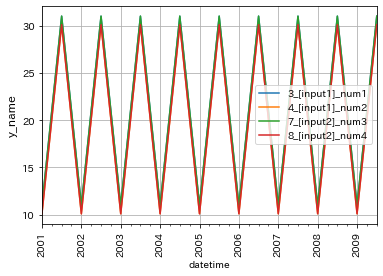

In [9]:
import matplotlib.pyplot as plt
dfa.plot(grid=True, linestyle='-', rot=90)
plt.ylabel('y_name',size=12)  #Y軸指定
# dfa.plot(grid=True, which='minor', linestyle='-', linewidth=0.25)

#(data, x, y, kind, ax, subplots, sharex, sharey, layout, figsize, use_index, title, grid, legend, style, 
#logx, logy, loglog, xticks, yticks, xlim, ylim, rot, fontsize, colormap, table, yerr, xerr, secondary_y, 
#sort_columns, **kwds)


# (self, xdata, ydata, linewidth, linestyle, color, marker, markersize, markeredgewidth, 
# markeredgecolor, markerfacecolor, markerfacecoloralt, fillstyle, antialiased, dash_capstyle, 
# solid_capstyle, dash_joinstyle, solid_joinstyle, pickradius, drawstyle, markevery, **kwargs)


# 3. pltで描画(datetime)

    datetime 1_[input1]_cat1 2_[input1]_cat2  3_[input1]_num1  \
0 2001-03-31               A             A-1               11   

   4_[input1]_num2 5_[input2]_cat3 6_[input2]_cat4  7_[input2]_num3  \
0             10.1               A             A-1               11   

   8_[input2]_num4  
0             10.1  


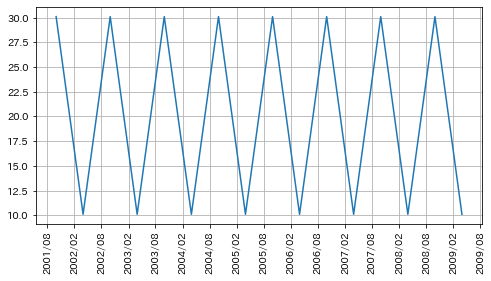

In [10]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dfb = dfa.reset_index()
print(dfb.head(1))

# データフレームの準備
start_datetime = datetime.datetime(2001, 3,31)
end_datetime = datetime.datetime(2009, 9,30)
# start_datetime = datetime.datetime(2016, 1,28)
# end_datetime = datetime.datetime(2016, 12,31)
target_df = dfb[(dfb["datetime"] > start_datetime)&(dfb["datetime"] < end_datetime)]

# 描画
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(target_df["datetime"], target_df["8_[input2]_num4"])

# 軸目盛の設定
# ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=31, tz=None))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

## 補助目盛りを使いたい場合や時刻まで表示したい場合は以下を調整して使用
# ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1), tz=None))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))

# 軸目盛ラベルの回転
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=10);

ax.grid(True)


No handles with labels found to put in legend.


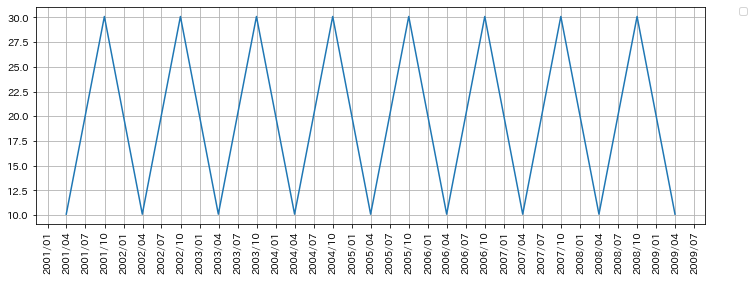

In [11]:
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def show_df_datetime(df):
    df = df.reset_index()

    # 開始、終了を取得
    dt = df['datetime']
    dt_start = dt.iloc[0]
    dt_end = dt.iloc[-1]
    dt_start = dt_start - timedelta(days=1)
    
    # データフレームの準備
    start_datetime = dt_start  #datetime.datetime(2001,3,30)
    end_datetime = dt_end  #datetime.datetime(2009,9,30)
    target_df = df[(df["datetime"] > start_datetime)&(df["datetime"] < end_datetime)]

    # 描画
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(target_df["datetime"], target_df["8_[input2]_num4"])

    # 軸目盛の設定
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3, tz=None))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))

    # 軸目盛ラベルの回転
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10);
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
dfc = dfa.reset_index()
show_df_datetime(dfa)
# print(dfc.head(1))


# 3. plt関数化(datetime)（日本語化など含む）

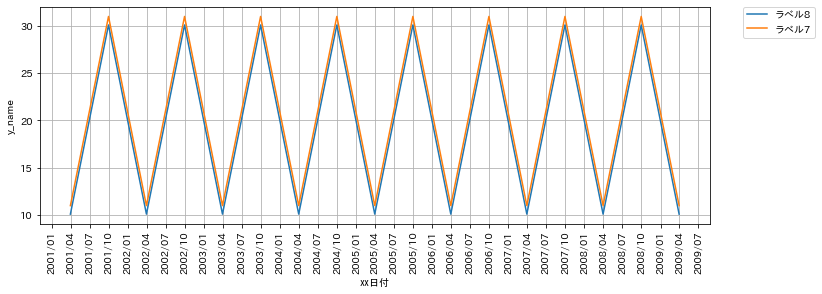

In [12]:
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# # plt.rcParams['font.sans-serif'] = 'Yu Mincho'
# from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']


def show_df_datetime(df):
    df = df.reset_index()

    # 開始、終了を取得
    dt = df['datetime']
    dt_start = dt.iloc[0]
    dt_end = dt.iloc[-1]
    dt_start = dt_start - timedelta(days=1)
    
    # データフレームの準備
    start_datetime = dt_start  #datetime.datetime(2001,3,30)
    end_datetime = dt_end  #datetime.datetime(2009,9,30)
    target_df = df[(df["datetime"] > start_datetime)&(df["datetime"] < end_datetime)]

    # 描画
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(target_df["datetime"], target_df["8_[input2]_num4"],label='ラべル8')
    ax.plot(target_df["datetime"], target_df["7_[input2]_num3"],label='ラベル7')

    # 軸目盛の設定
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3, tz=None))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))

    # 軸目盛ラベルの回転
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10);
    ax.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('xx日付', fontname="MS Gothic")  #Y軸指定
    plt.ylabel('y_name')  #Y軸指定

    
show_df_datetime(dfa)
# print(dfc.head(1))


In [13]:
#以下、失敗。
# IPAexゴシック(Ver.002.01)をダウンロード
# 解凍してできたipaexg.ttfを \site-packages\matplotlib\mpl-data\fonts\ttf以下にコピー


#おそらく以下で成功。
# pip install --upgrade matplotlib

# 4. テキスト入力(datetime)

In [14]:
from ipywidgets import interact, Select

In [15]:
@interact(mode1='A01', mode2='B01', save=True)
def f(mode1, mode2, save):
    print(mode1)
    show_df_datetime(dfa)

interactive(children=(Text(value='A01', description='mode1'), Text(value='B01', description='mode2'), Checkbox…

# 5.selectbox(datetime)

In [16]:
import inner
inner.run(dfa)


run


interactive(children=(Select(description='y1', options=('2002', '2003', '2004', '2005', '2006'), rows=1, value…

# 6. pairplot

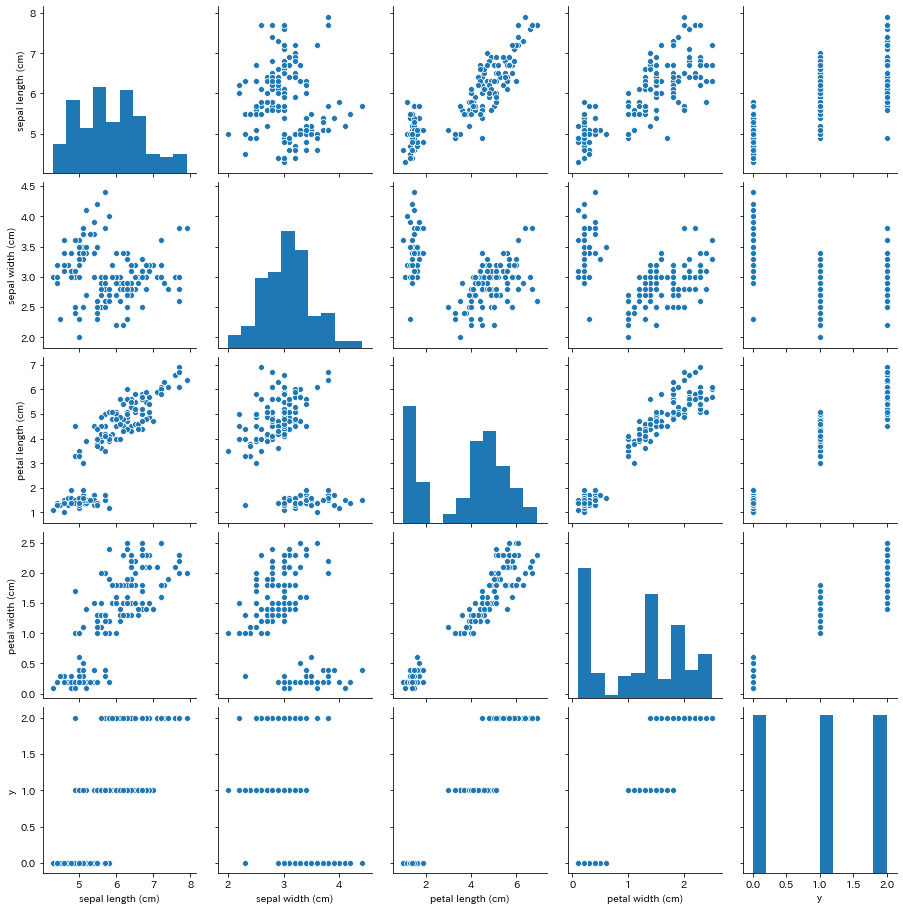

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['y'])
df = pd.concat([df_X, df_y], axis=1)

import matplotlib
import seaborn as sns
sns.pairplot(df, diag_kind='hist')

# 7. 散布図（色付き）

y
--------------------------------
x:  sepal length (cm)
y:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'y']
--------------------------------


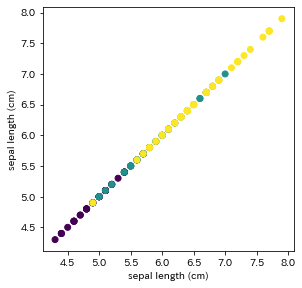

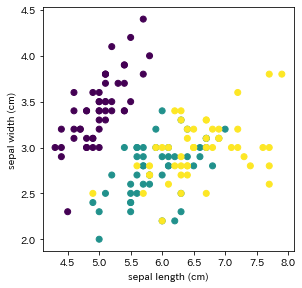

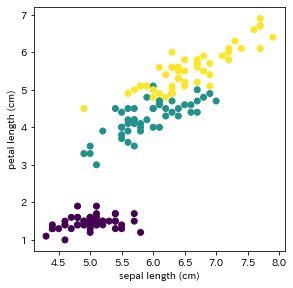

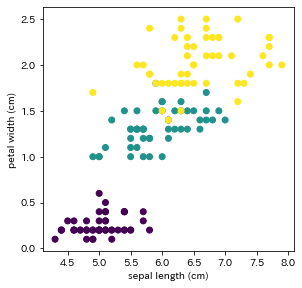

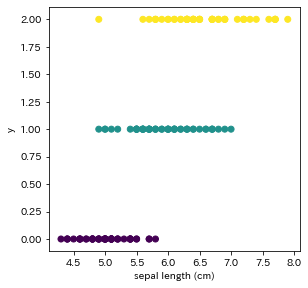

--------------------------------
x:  sepal width (cm)
y:  ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'y']
--------------------------------


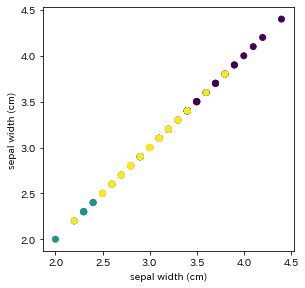

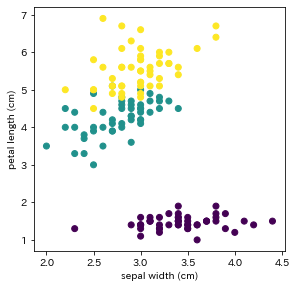

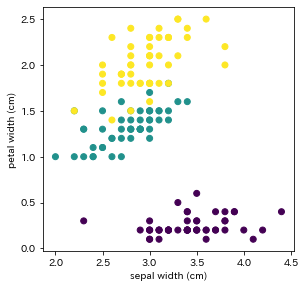

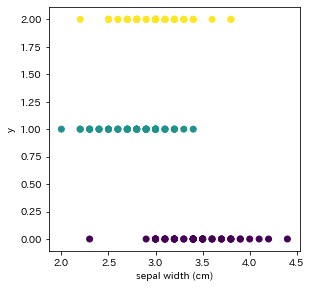

--------------------------------
x:  petal length (cm)
y:  ['petal length (cm)', 'petal width (cm)', 'y']
--------------------------------


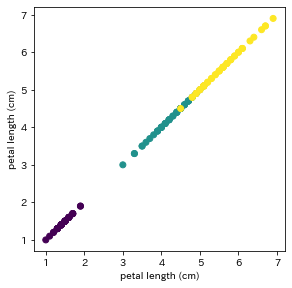

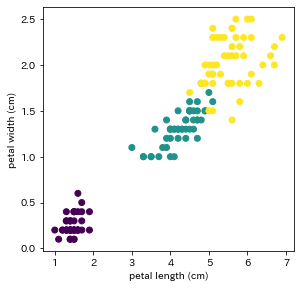

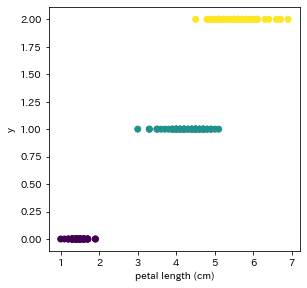

--------------------------------
x:  petal width (cm)
y:  ['petal width (cm)', 'y']
--------------------------------


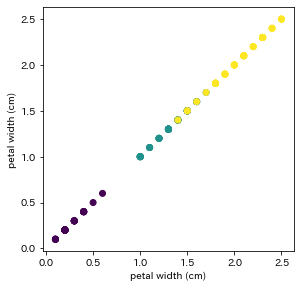

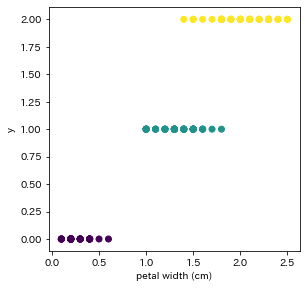

--------------------------------
x:  y
y:  ['y']
--------------------------------


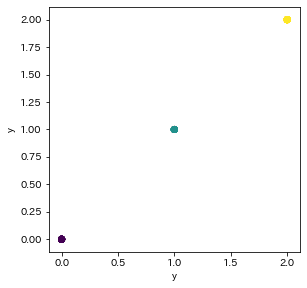

y
--------------------------------
x:  sepal length (cm)
y:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'y']
--------------------------------


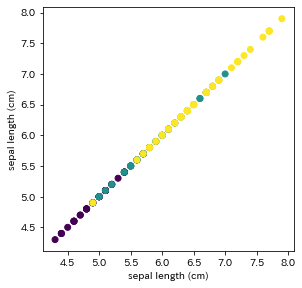

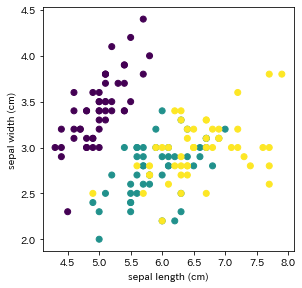

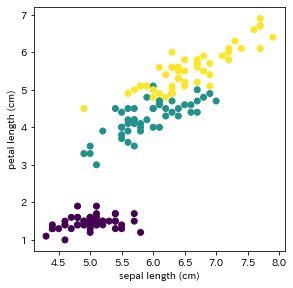

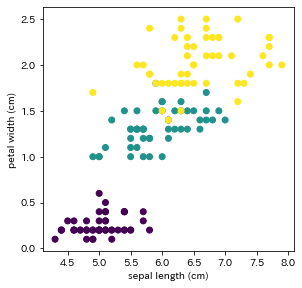

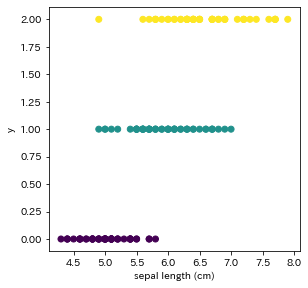

--------------------------------
x:  sepal width (cm)
y:  ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'y']
--------------------------------


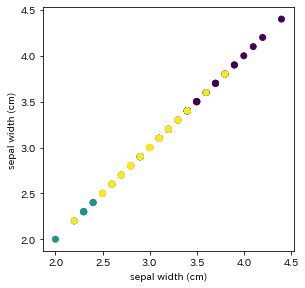

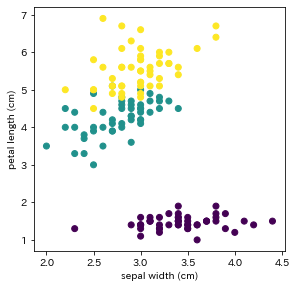

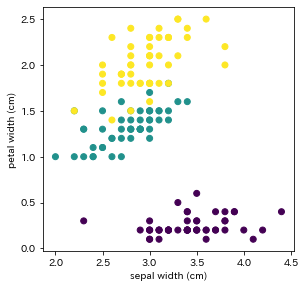

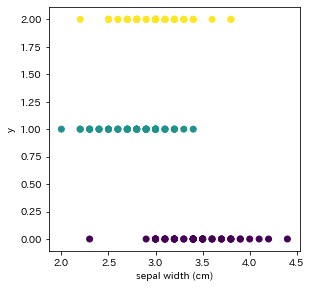

--------------------------------
x:  petal length (cm)
y:  ['petal length (cm)', 'petal width (cm)', 'y']
--------------------------------


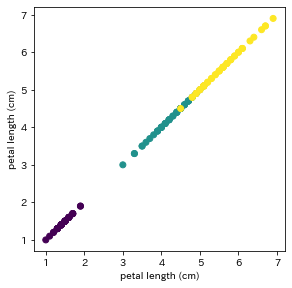

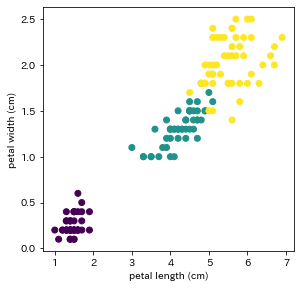

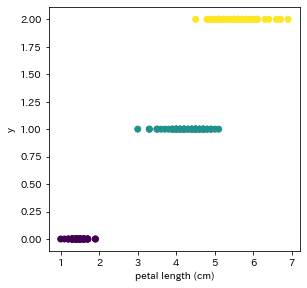

--------------------------------
x:  petal width (cm)
y:  ['petal width (cm)', 'y']
--------------------------------


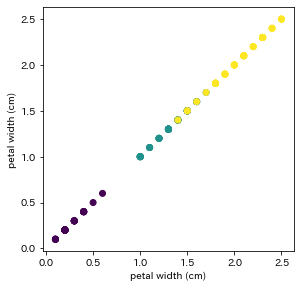

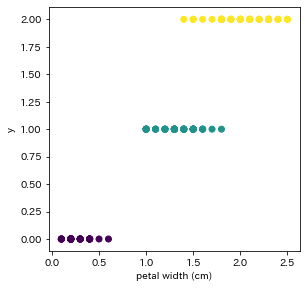

--------------------------------
x:  y
y:  ['y']
--------------------------------


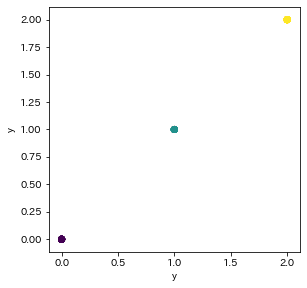

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['y'])
df = pd.concat([df_X, df_y], axis=1)

def show_scatter(df, column_cat_name):
    col_list_x = df.columns.tolist()
    col_list_y = df.columns.tolist()

    for col_x in col_list_x:
        print('--------------------------------')
        print('x: ', col_x)
        print('y: ', col_list_y)
        print('--------------------------------')
        for col_y in col_list_y:
            #print('---')
            #print(col_list_y)
            #print('---')
            
            plt.figure(figsize=(4.5,4.5))
            plt.scatter(df[col_x], df[col_y], c=df[column_cat_name])
            plt.xlabel(col_x)
            plt.ylabel(col_y)
            plt.show()

        # 対角を削除
        del col_list_y[0]
            
    
column_cat_name_list = ['y', 'y']

for column_cat_name in column_cat_name_list:
    print('=======================')
    print(column_cat_name)
    print('=======================')
    show_scatter(df, column_cat_name)


# 8.LabelEncoder

In [19]:
df = pd.DataFrame({'id': [1, 1, 2, 2],
                   'category1': ['A', 'A', 'B', 'C'],
                   'category2': ['I', 'I', 'J', 'J'],
                   'num1': [21, 22, 23, 24],
                   'num2': [31, 32, 33, 34]}
                  )
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
id           4 non-null int64
category1    4 non-null object
category2    4 non-null object
num1         4 non-null int64
num2         4 non-null int64
dtypes: int64(3), object(2)
memory usage: 240.0+ bytes
None


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(df['category1'])
encoded = le.transform(df['category1'])
df['category1'] = encoded
df.head()

,id,category1,category2,num1,num2
0,1,0,I,21,31
1,1,0,I,22,32
2,2,1,J,23,33
3,2,2,J,24,34


In [21]:
decoded = le.inverse_transform(encoded)
df['category1'] = decoded
df.head()

,id,category1,category2,num1,num2
0,1,A,I,21,31
1,1,A,I,22,32
2,2,B,J,23,33
3,2,C,J,24,34


In [22]:
from sklearn.preprocessing import LabelEncoder

def le(df, col_list):
    le_list = []
    for i in col_list:
        le = LabelEncoder()
        le = le.fit(df[i])
        encoded = le.transform(df[i])
        df[i] = encoded
        le_list.append(le)
    return df, le_list


def ld(df, col_list, le_list):
    for col, le in zip(col_list, le_list):
        decoded = le.inverse_transform(df[col])
        df[col] = decoded
    return df


# encode
col_list = ['category1', 'category2']
df, le_list = le(df, col_list)
print(df)

# decode
df = ld(df, col_list, le_list)
print(df)

   id  category1  category2  num1  num2
0   1          0          0    21    31
1   1          0          0    22    32
2   2          1          1    23    33
3   2          2          1    24    34
   id category1 category2  num1  num2
0   1         A         I    21    31
1   1         A         I    22    32
2   2         B         J    23    33
3   2         C         J    24    34


# 9. OneHotEncode

In [23]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,id,num1,num2,category1_B,category1_C,category2_J
0,1,21,31,0,0,0
1,1,22,32,0,0,0
2,2,23,33,1,0,1
3,2,24,34,0,1,1


In [24]:
df_ohe = pd.get_dummies(df)

In [25]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

df_decode = undummify(df_ohe)
df_decode

,id,num1,num2,category1,category2
0,1,21,31,A,I
1,1,22,32,A,I
2,2,23,33,B,J
3,2,24,34,C,J
